# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | spring creek
Processing Record 3 of Set 1 | vorgashor
Processing Record 4 of Set 1 | campbellton
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | ritchie
Processing Record 7 of Set 1 | polyarnyy
Processing Record 8 of Set 1 | kuloy
Processing Record 9 of Set 1 | ulsteinvik
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | masterton
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | porto novo
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | yeniseysk
Processing Record 19 of Set 1 | fallon
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | adamstown
Processing Record 22 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,spring creek,40.7266,-115.5859,286.98,66,92,4.14,US,1726530995
1,vorgashor,67.5833,63.9500,285.24,98,98,3.24,RU,1726530996
2,campbellton,48.0075,-66.6727,298.40,76,4,2.51,CA,1726530997
3,invercargill,-46.4000,168.3500,279.83,66,96,5.36,NZ,1726530998
4,ritchie,-29.0380,24.6028,290.19,57,78,5.32,ZA,1726530999


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

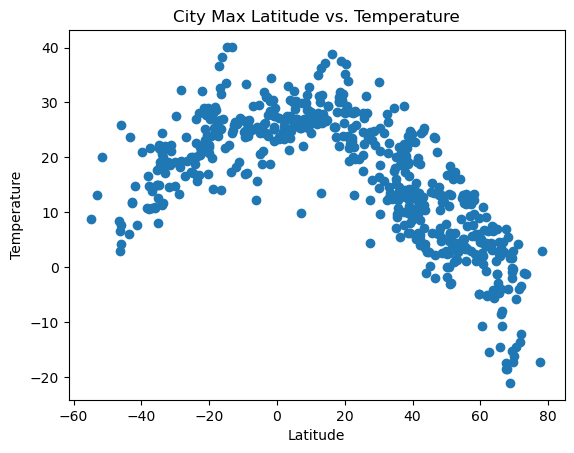

In [16]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_temp = city_data_df['Max Temp']
plt.scatter(x_values, y_temp)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title(f"City Max Latitude vs. Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

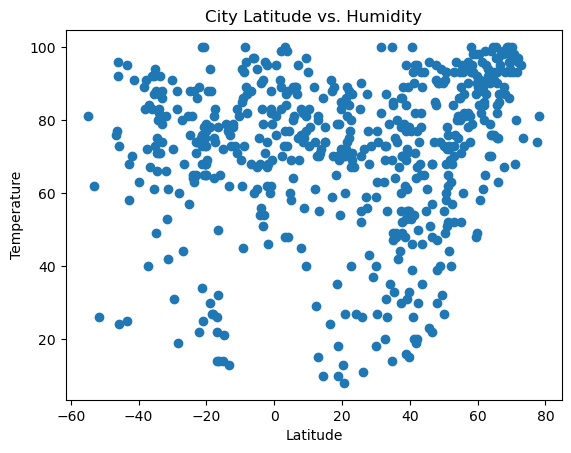

In [17]:
# Build the scatter plots for latitude vs. humidity
y_humidity = city_data_df['Humidity']
plt.scatter(x_values, y_humidity)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('City Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

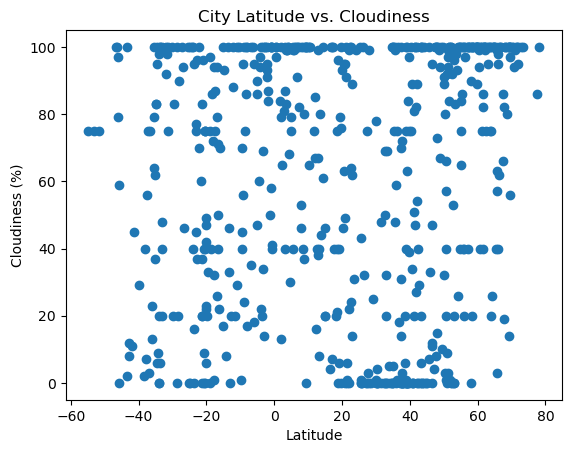

In [18]:
# Build the scatter plots for latitude vs. cloudiness
y_cloud = city_data_df['Cloudiness']
plt.scatter(x_values, y_cloud)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

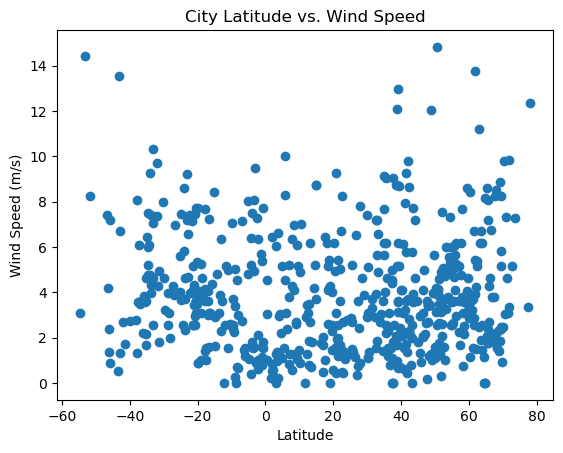

In [19]:
# Build the scatter plots for latitude vs. wind speed
y_wind = city_data_df['Wind Speed']
plt.scatter(x_values, y_wind)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
from scipy import stats
def create_linear_regression_plot(x_values, y_values, x_label, y_label):
    # Create a scatter plot
    plt.scatter(x_values, y_values, color='blue', label='Data Points')

    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Calculate regression values
    regress_values = x_values * slope + intercept

    # Create the regression line plot
    plt.plot(x_values, regress_values, color='red', label='Regression Line')

    # Create the equation string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Label the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Linear Regression: {x_label} vs {y_label}')
    plt.annotate(line_eq, (min(x_values), max(y_values) - 10), fontsize=15, color="red")

    # Print r-value
    print(f"The r-value is: {rvalue}")

    # Show the legend and plot
    plt.legend()
    plt.show()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8462548186825359


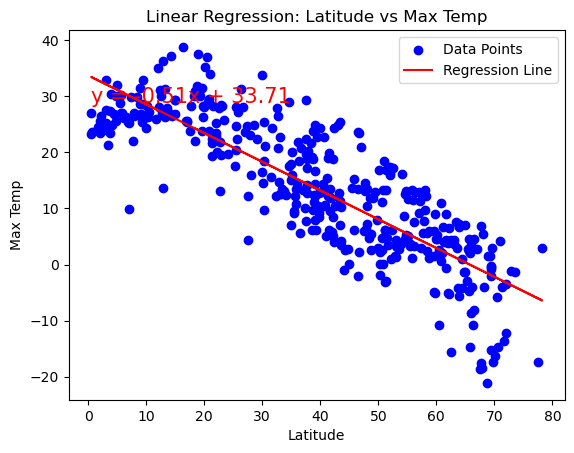

In [32]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

The r-value is: 0.6419546065421794


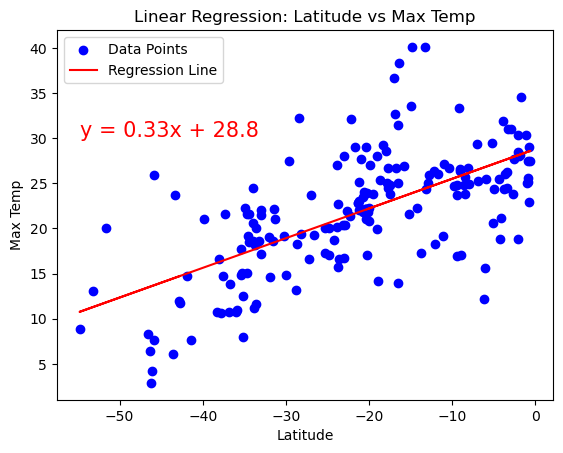

In [33]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** When in the Northern Hemisphere, the max temperature falls as we move further from the equater. In the Southern Hemisphere, the opposite happens as the max temperature increases as we move closer to the equater.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23853179129394056


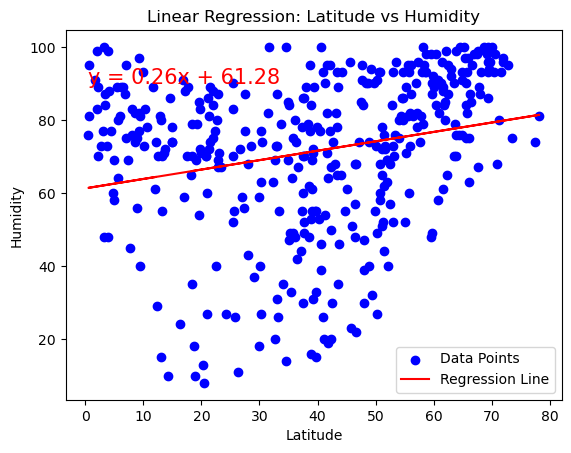

In [34]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

The r-value is: 0.0167593169500568


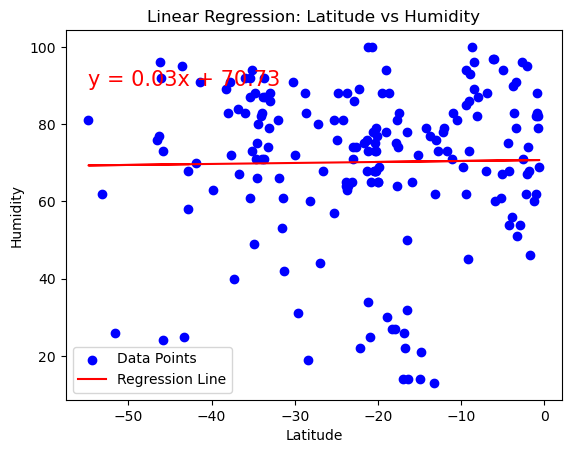

In [36]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** There is a slight positive correlation between latitude and humidity in the Northern Hemisphere, but no correlation in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.15500489387697095


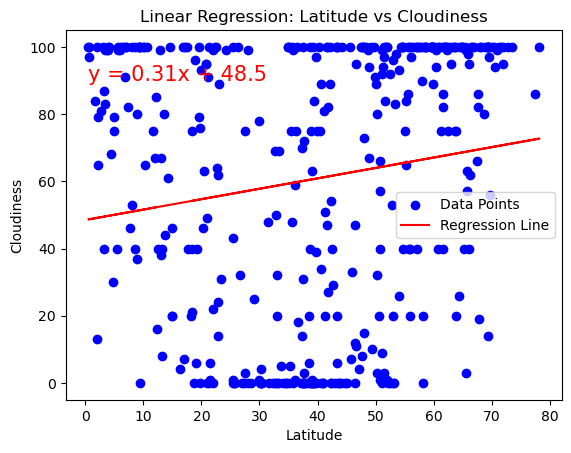

In [37]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

The r-value is: 0.14341322916643243


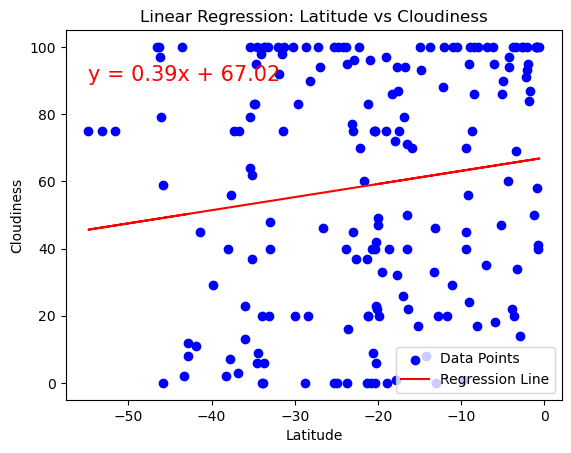

In [38]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** There is a positive correlation with latitude and cloudiness in both the Northern and Southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17434667290903333


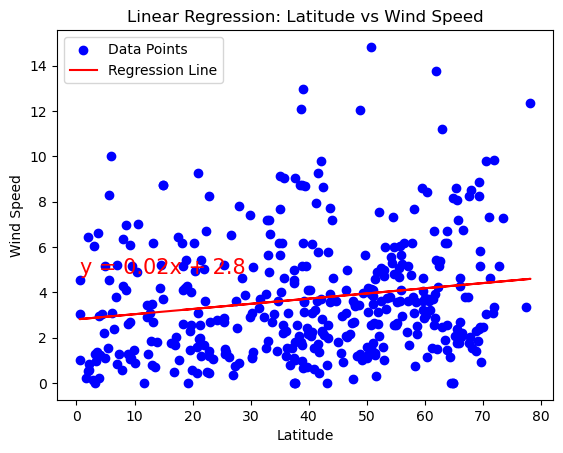

In [39]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

The r-value is: -0.24947753546264587


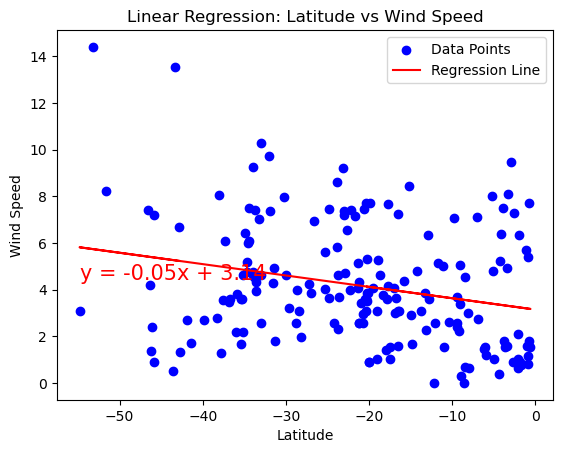

In [40]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** There is a slight positive correlation between wind speed and latitude in the Northern Hemisphere, whil there is a negative correlation in the Southern Hemisphere.